<a href="https://colab.research.google.com/github/aayushrai/NLP/blob/master/Tensorflow/IMDB_Subwords_8K_with_Multilayer_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.2.0


In [2]:
dataset,info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)
train_dataset,test_dataset = dataset["train"],dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [14]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size,64),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(64,activation="relu"), 
        tf.keras.layers.Dense(1,activation="sigmoid")                    
                             ])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 111s 283ms/step - loss: 0.5965 - accuracy: 0.6769 - val_loss: 0.6067 - val_accuracy: 0.6808
Epoch 2/10
391/391 [==============================] - 109s 279ms/step - loss: 0.4756 - accuracy: 0.7799 - val_loss: 0.3905 - val_accuracy: 0.8288
Epoch 3/10
391/391 [==============================] - 110s 281ms/step - loss: 0.2785 - accuracy: 0.8861 - val_loss: 0.3563 - val_accuracy: 0.8429
Epoch 4/10
391/391 [==============================] - 109s 278ms/step - loss: 0.2063 - accuracy: 0.9225 - val_loss: 0.3435 - val_accuracy: 0.8615
Epoch 5/10
391/391 [==============================] - 109s 278ms/step - loss: 0.1616 - accuracy: 0.9422 - val_loss: 0.3504 - val_accuracy: 0.8729
Epoch 6/10
391/391 [==============================] - 109s 279ms/step - loss: 0.1234 - accuracy: 0.9586 - val_loss: 0.4047 - val_accuracy: 0.8658
Epoch 7/10
391/391 [==============================] - 109s 279ms/step - loss: 0.1011 - accuracy: 0.9667 - val_loss: 0.4503 -

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

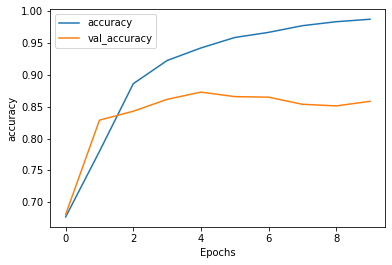

In [19]:
plot_graphs(history, 'accuracy')

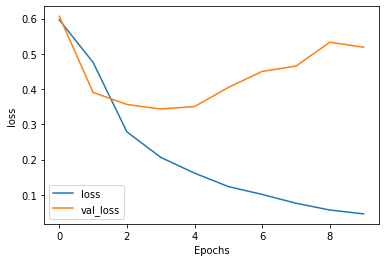

In [20]:

plot_graphs(history, 'loss')